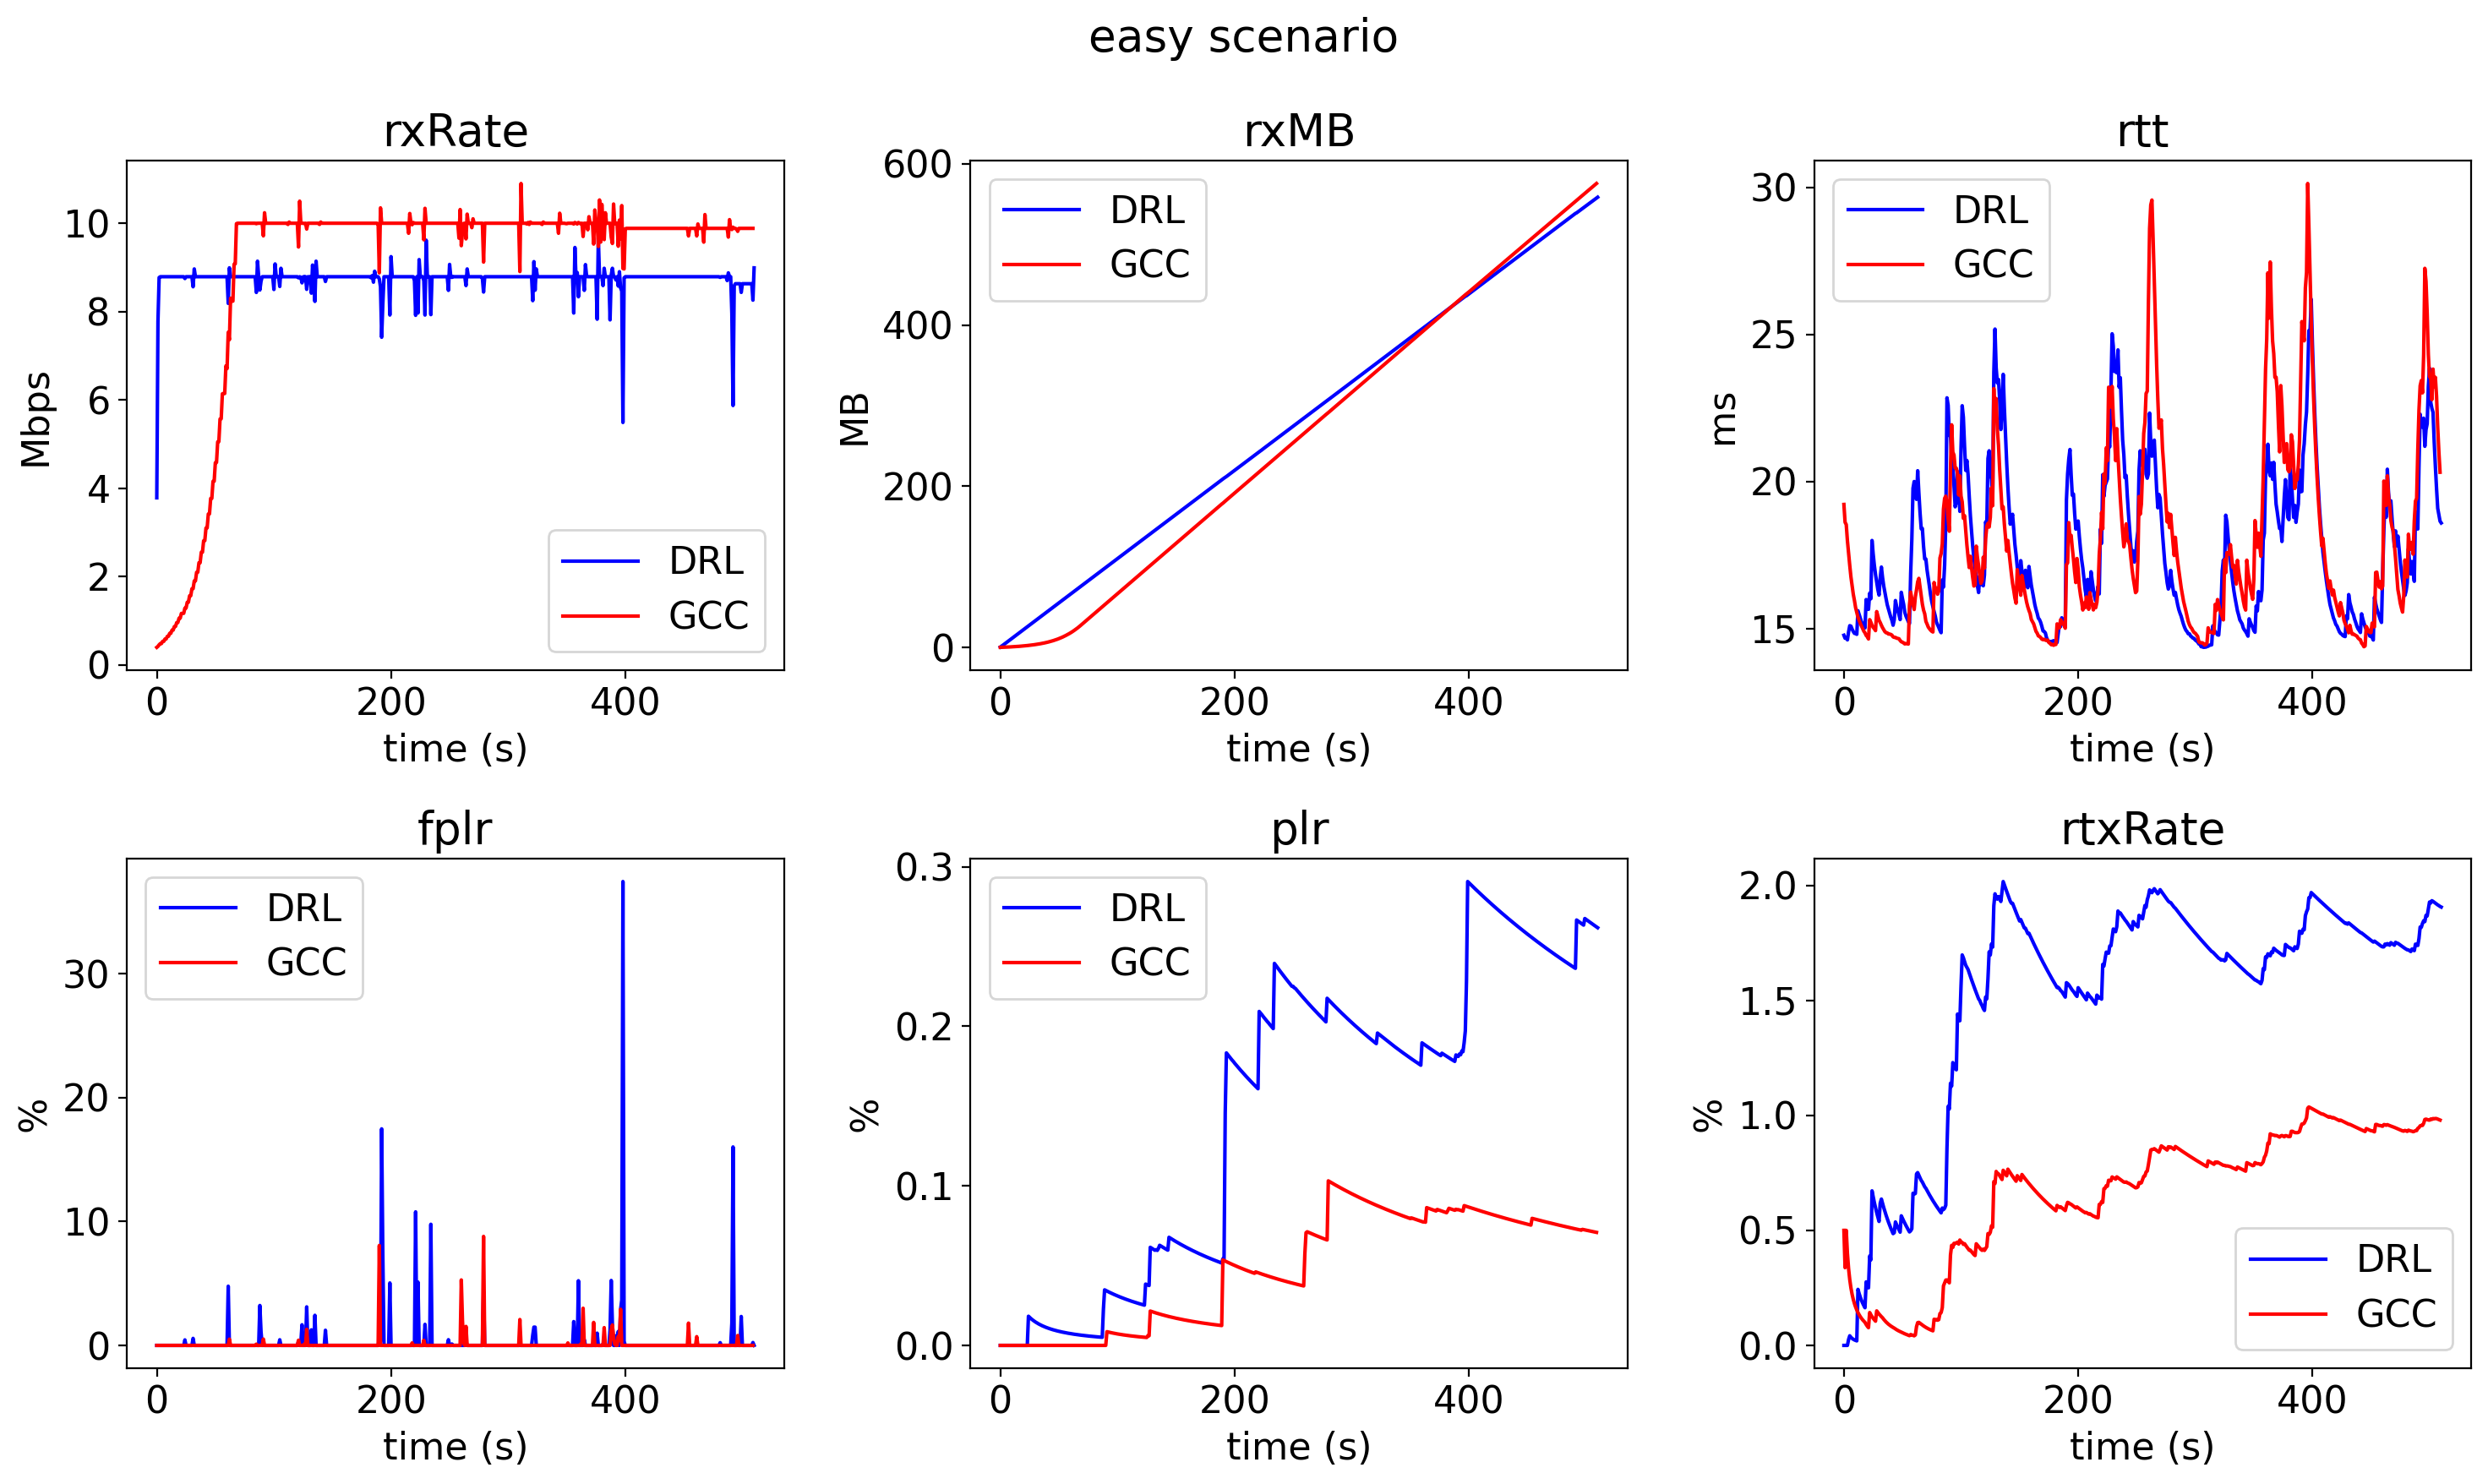

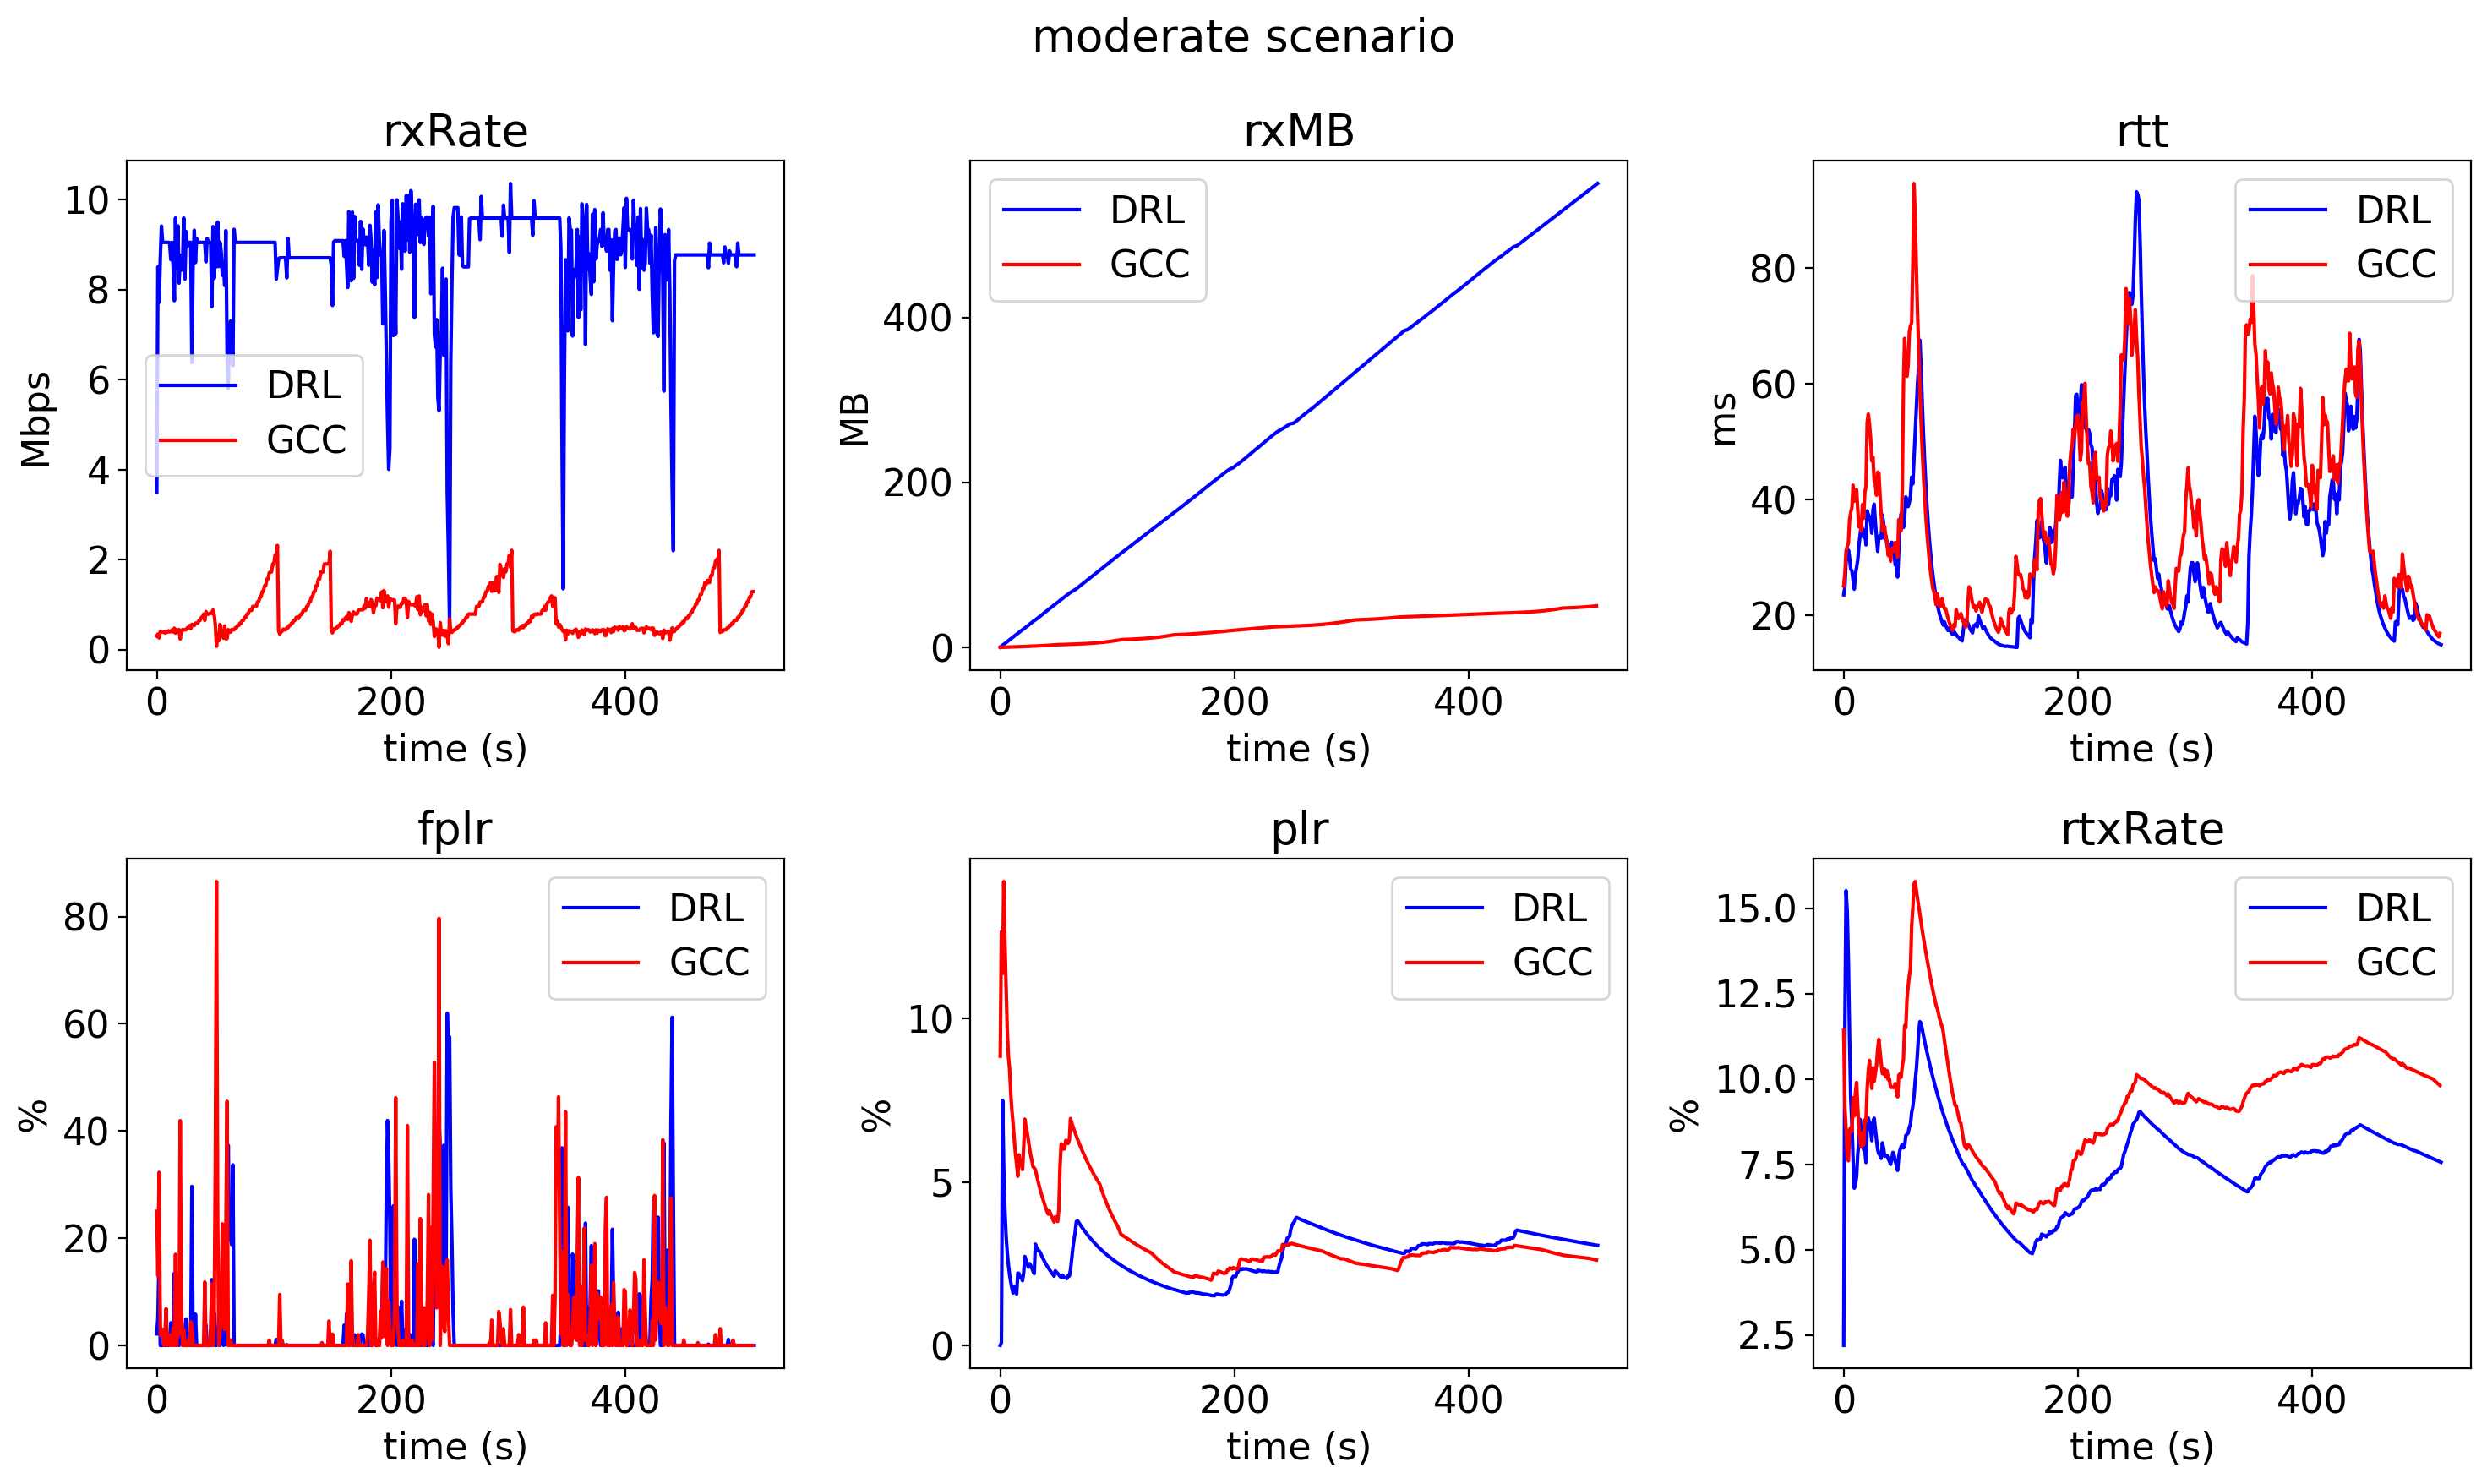

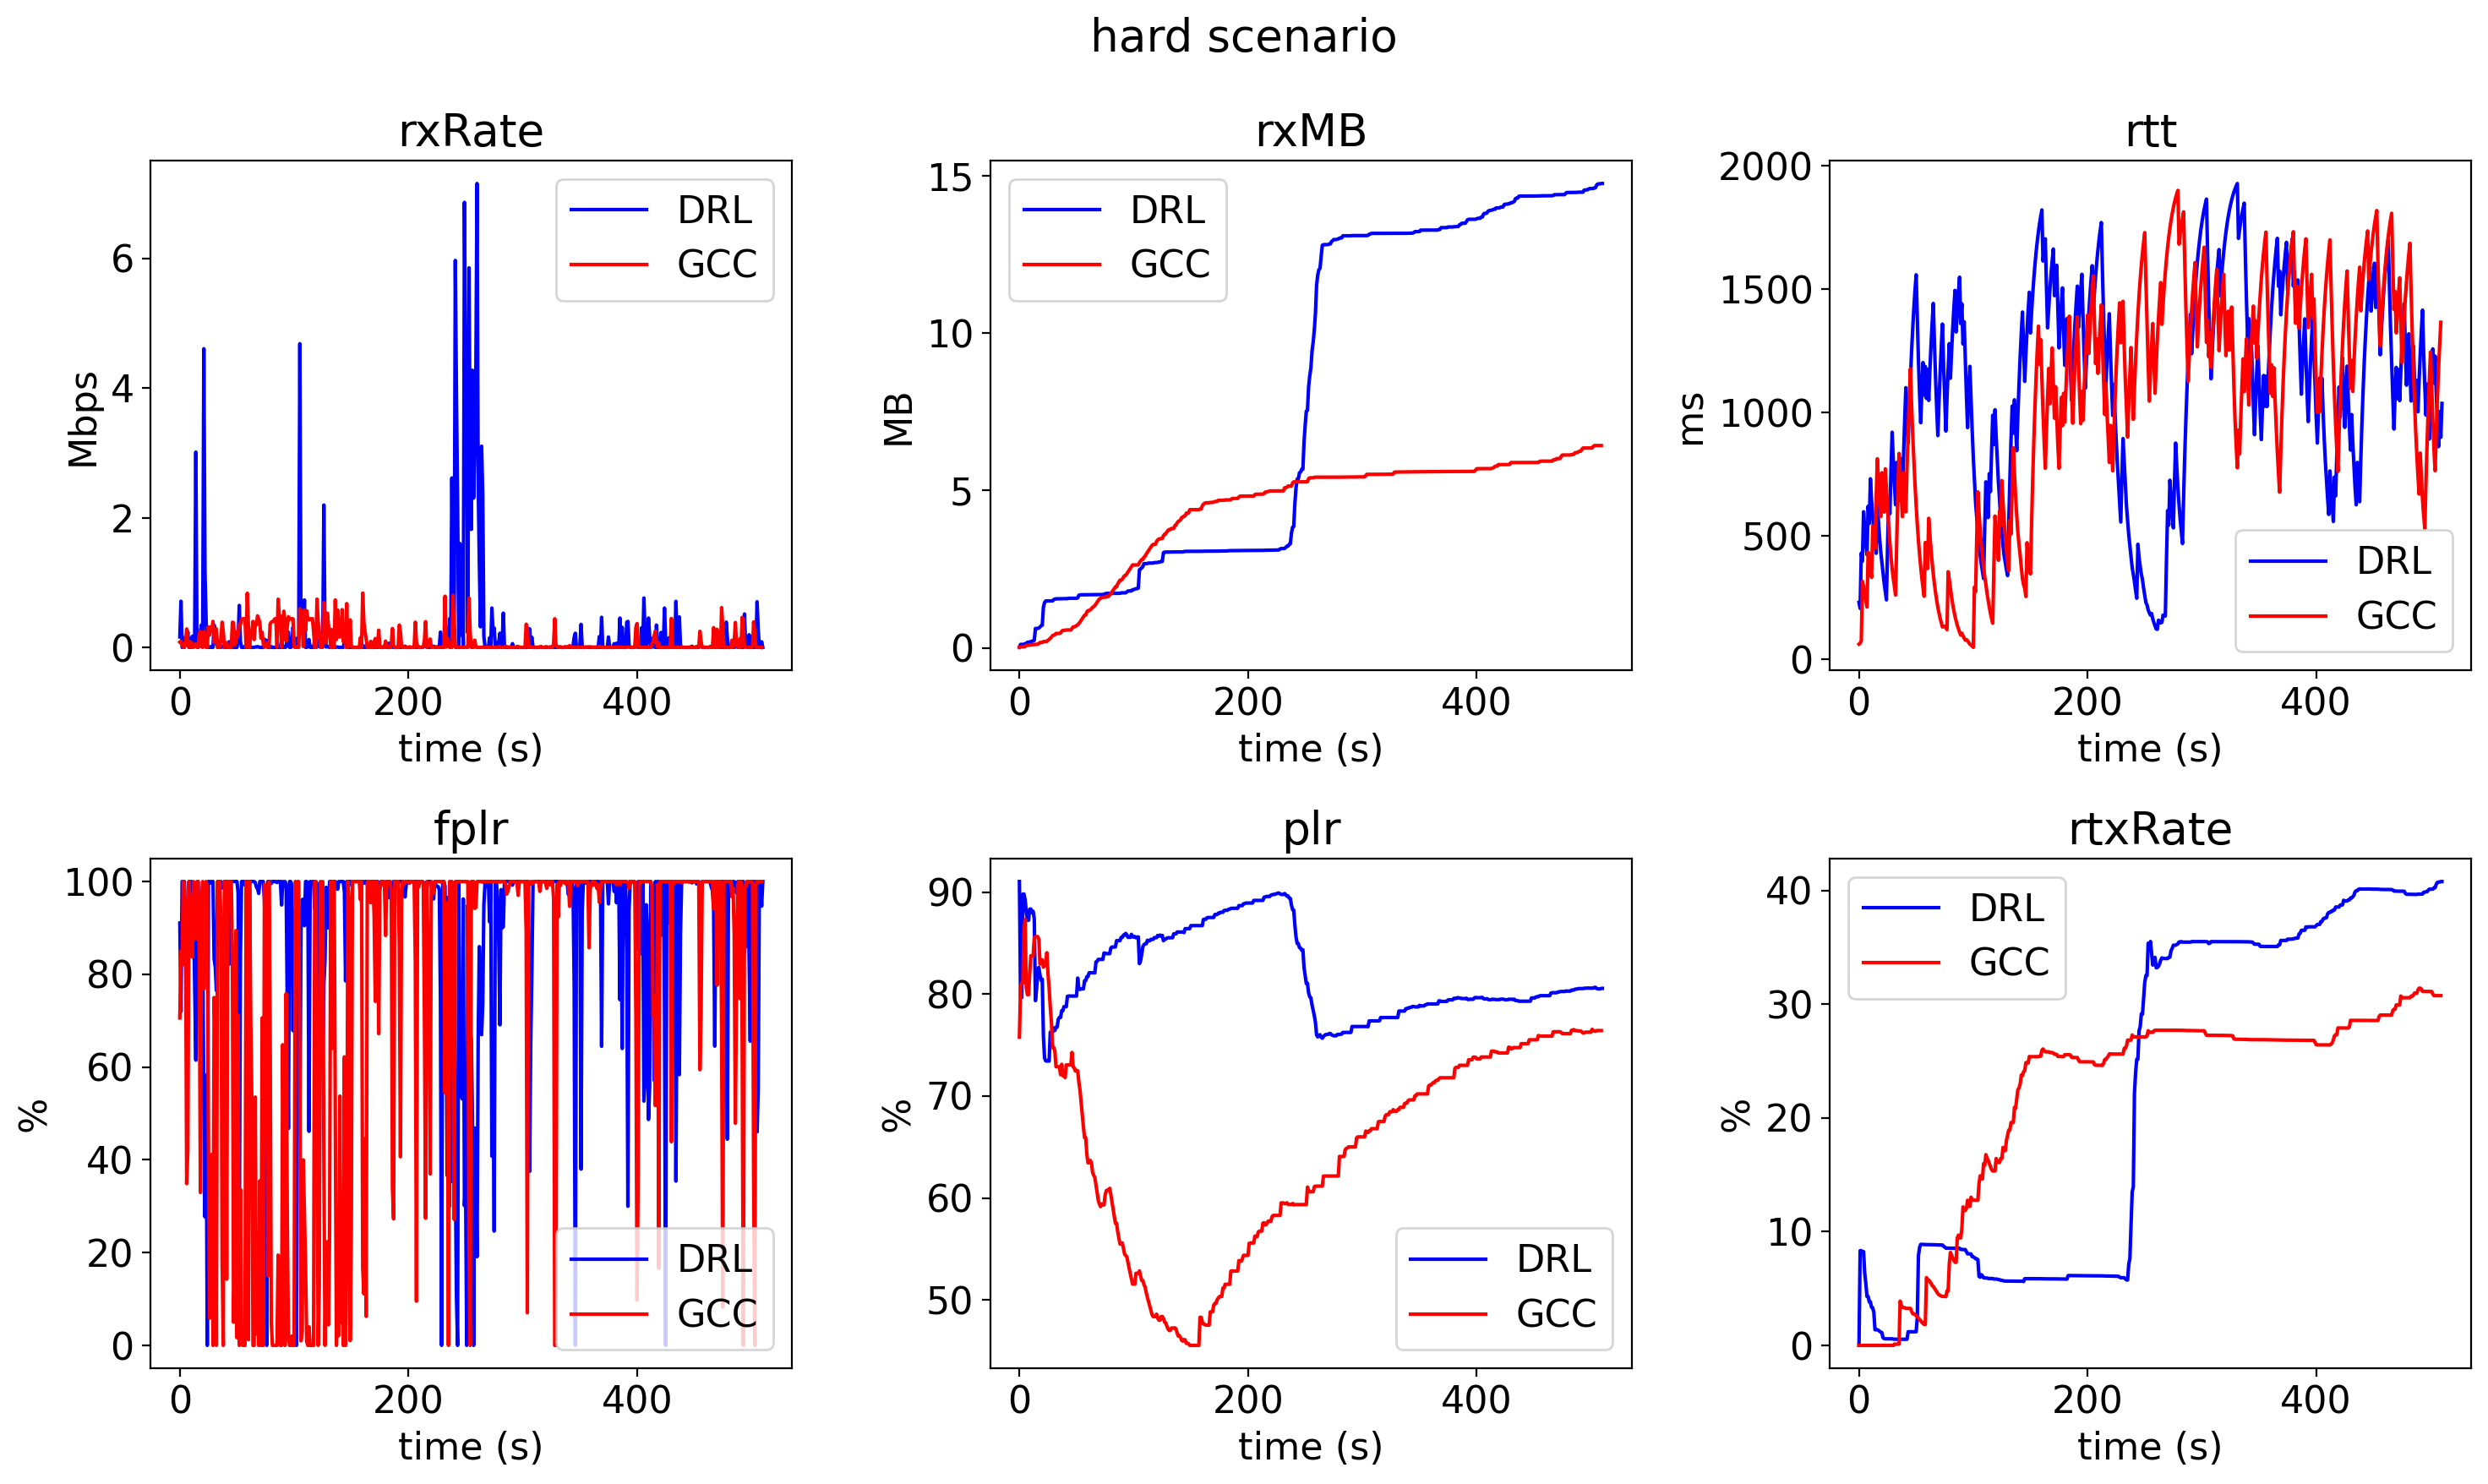

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# load gymir5g log dfs (we've a bit spoiled the gymir5g log names in a training notebook :-))

# dfs
# easy drl
easy_drl_df = pd.read_csv('./easy_drl_det/stream_stream.csv')
# easy gcc
easy_gcc_df = pd.read_csv('./easy_gcc/easy_gccstream_stream.csv')
# moderate drl
moderate_drl_df = pd.read_csv('./mod_drl_det/stream_stream.csv')
# moderate gcc
moderate_gcc_df = pd.read_csv('./mod_gcc/mod_gccstream_stream.csv')
# hard drl
hard_drl_df = pd.read_csv('./hard_drl_det/stream_stream.csv')
# hard gcc
hard_gcc_df = pd.read_csv('./hard_gcc/hard_gccstream_stream.csv')

# mentioned in Sec. 3.4 of the paper
def action_to_bitrate_mbps(action: float, dataRateMinMbps: float = 0.4, dataRateMaxMbps: float = 10.0)-> float:
    return 0.5 * (action + 1) * (dataRateMaxMbps - dataRateMinMbps) + dataRateMinMbps

# apply action_to_bitrate_mbps to all lastAction columns
easy_drl_df['lastAction'] = easy_drl_df['lastAction'].apply(action_to_bitrate_mbps).astype(float)
moderate_drl_df['lastAction'] = moderate_drl_df['lastAction'].apply(action_to_bitrate_mbps).astype(float)
hard_drl_df['lastAction'] = hard_drl_df['lastAction'].apply(action_to_bitrate_mbps).astype(float)

# divide lastAction by 1000 to get mbps
easy_gcc_df['lastAction'] = easy_gcc_df['lastAction'].div(1000).astype(float)
moderate_gcc_df['lastAction'] = moderate_gcc_df['lastAction'].div(1000).astype(float)
hard_gcc_df['lastAction'] = hard_gcc_df['lastAction'].div(1000).astype(float)

# transform rxBytes to megabytes
easy_drl_df['rxBytes'] = easy_drl_df['rxBytes'].div(1000000).astype(float)
moderate_drl_df['rxBytes'] = moderate_drl_df['rxBytes'].div(1000000).astype(float)
hard_drl_df['rxBytes'] = hard_drl_df['rxBytes'].div(1000000).astype(float)
easy_gcc_df['rxBytes'] = easy_gcc_df['rxBytes'].div(1000000).astype(float)
moderate_gcc_df['rxBytes'] = moderate_gcc_df['rxBytes'].div(1000000).astype(float)
hard_gcc_df['rxBytes'] = hard_gcc_df['rxBytes'].div(1000000).astype(float)

# transform to percentages
easy_drl_df['lossRate'] = easy_drl_df['lossRate'].mul(100).astype(float)
moderate_drl_df['lossRate'] = moderate_drl_df['lossRate'].mul(100).astype(float)
hard_drl_df['lossRate'] = hard_drl_df['lossRate'].mul(100).astype(float)
easy_gcc_df['lossRate'] = easy_gcc_df['lossRate'].mul(100).astype(float)
moderate_gcc_df['lossRate'] = moderate_gcc_df['lossRate'].mul(100).astype(float)
hard_gcc_df['lossRate'] = hard_gcc_df['lossRate'].mul(100).astype(float)
easy_drl_df['fractionLossRate'] = easy_drl_df['fractionLossRate'].mul(100).astype(float)
moderate_drl_df['fractionLossRate'] = moderate_drl_df['fractionLossRate'].mul(100).astype(float)
hard_drl_df['fractionLossRate'] = hard_drl_df['fractionLossRate'].mul(100).astype(float)
easy_gcc_df['fractionLossRate'] = easy_gcc_df['fractionLossRate'].mul(100).astype(float)
moderate_gcc_df['fractionLossRate'] = moderate_gcc_df['fractionLossRate'].mul(100).astype(float)
hard_gcc_df['fractionLossRate'] = hard_gcc_df['fractionLossRate'].mul(100).astype(float)
easy_drl_df['retransmissionRate'] = easy_drl_df['retransmissionRate'].mul(100).astype(float)
moderate_drl_df['retransmissionRate'] = moderate_drl_df['retransmissionRate'].mul(100).astype(float)
hard_drl_df['retransmissionRate'] = hard_drl_df['retransmissionRate'].mul(100).astype(float)
easy_gcc_df['retransmissionRate'] = easy_gcc_df['retransmissionRate'].mul(100).astype(float)
moderate_gcc_df['retransmissionRate'] = moderate_gcc_df['retransmissionRate'].mul(100).astype(float)
hard_gcc_df['retransmissionRate'] = hard_gcc_df['retransmissionRate'].mul(100).astype(float)

# rename columns 
plot_easy_drl_df = easy_drl_df[['fractionRxGoodput', 'rxBytes', 'rtt', 'fractionLossRate', 'lossRate', 'retransmissionRate']].rename(columns={'fractionRxGoodput': 'rxRate', 'rxBytes': 'rxMB', 'rtt': 'rtt', 'fractionLossRate': 'fplr', 'lossRate': 'plr', 'retransmissionRate': 'rtxRate'})
plot_easy_gcc_df = easy_gcc_df[['fractionRxGoodput', 'rxBytes', 'rtt', 'fractionLossRate', 'lossRate', 'retransmissionRate']].rename(columns={'fractionRxGoodput': 'rxRate', 'rxBytes': 'rxMB', 'rtt': 'rtt', 'fractionLossRate': 'fplr', 'lossRate': 'plr', 'retransmissionRate': 'rtxRate'})
plot_moderate_drl_df = moderate_drl_df[['fractionRxGoodput', 'rxBytes', 'rtt', 'fractionLossRate', 'lossRate', 'retransmissionRate']].rename(columns={'fractionRxGoodput': 'rxRate', 'rxBytes': 'rxMB', 'rtt': 'rtt', 'fractionLossRate': 'fplr', 'lossRate': 'plr', 'retransmissionRate': 'rtxRate'})
plot_moderate_gcc_df = moderate_gcc_df[['fractionRxGoodput', 'rxBytes', 'rtt', 'fractionLossRate', 'lossRate', 'retransmissionRate']].rename(columns={'fractionRxGoodput': 'rxRate', 'rxBytes': 'rxMB', 'rtt': 'rtt', 'fractionLossRate': 'fplr', 'lossRate': 'plr', 'retransmissionRate': 'rtxRate'})
plot_hard_drl_df = hard_drl_df[['fractionRxGoodput', 'rxBytes', 'rtt', 'fractionLossRate', 'lossRate', 'retransmissionRate']].rename(columns={'fractionRxGoodput': 'rxRate', 'rxBytes': 'rxMB', 'rtt': 'rtt', 'fractionLossRate': 'fplr', 'lossRate': 'plr', 'retransmissionRate': 'rtxRate'})
plot_hard_gcc_df = hard_gcc_df[['fractionRxGoodput', 'rxBytes', 'rtt', 'fractionLossRate', 'lossRate', 'retransmissionRate']].rename(columns={'fractionRxGoodput': 'rxRate', 'rxBytes': 'rxMB', 'rtt': 'rtt', 'fractionLossRate': 'fplr', 'lossRate': 'plr', 'retransmissionRate': 'rtxRate'})

# plot function
def plot(df1: pd.DataFrame, df2: pd.DataFrame, title: str) -> None:
    # increase fontsize
    plt.rcParams.update({'font.size': 16})
    fig, axs = plt.subplots(2, 3, figsize=(15, 9), dpi=200)
    fig.suptitle(f"{title} scenario")
    axs[0, 0].plot(df1['rxRate'], label='DRL', color='blue')
    axs[0, 0].plot(df2['rxRate'], label='GCC', color='red')
    axs[0, 0].set_title('rxRate')
    axs[0, 0].set_xlabel('time (s)')
    axs[0, 0].set_ylabel('Mbps')
    axs[0, 0].legend()
    axs[0, 1].plot(df1['rxMB'], label='DRL', color='blue')
    axs[0, 1].plot(df2['rxMB'], label='GCC', color='red')
    axs[0, 1].set_title('rxMB')
    axs[0, 1].set_xlabel('time (s)')
    axs[0, 1].set_ylabel('MB')
    axs[0, 1].legend()
    axs[0, 2].plot(df1['rtt'], label='DRL', color='blue')
    axs[0, 2].plot(df2['rtt'], label='GCC', color='red')
    axs[0, 2].set_title('rtt')
    axs[0, 2].set_xlabel('time (s)')
    axs[0, 2].set_ylabel('ms')
    axs[0, 2].legend()
    axs[1, 0].plot(df1['fplr'], label='DRL', color='blue')
    axs[1, 0].plot(df2['fplr'], label='GCC', color='red')
    axs[1, 0].set_title('fplr')
    axs[1, 0].set_xlabel('time (s)')
    axs[1, 0].set_ylabel('%')
    axs[1, 0].legend()
    axs[1, 1].plot(df1['plr'], label='DRL', color='blue')
    axs[1, 1].plot(df2['plr'], label='GCC', color='red')
    axs[1, 1].set_title('plr')
    axs[1, 1].set_xlabel('time (s)')
    axs[1, 1].set_ylabel('%')
    axs[1, 1].legend()
    axs[1, 2].plot(df1['rtxRate'], label='DRL', color='blue')
    axs[1, 2].plot(df2['rtxRate'], label='GCC', color='red')
    axs[1, 2].set_title('rtxRate')
    axs[1, 2].set_xlabel('time (s)')
    axs[1, 2].set_ylabel('%')
    axs[1, 2].legend()
    plt.tight_layout()
    plt.savefig(f'{title}.png')
    plt.show()

plot(plot_easy_drl_df, plot_easy_gcc_df, 'easy')
plot(plot_moderate_drl_df, plot_moderate_gcc_df, 'moderate')
plot(plot_hard_drl_df, plot_hard_gcc_df, 'hard')



